# Affinity Propagation

> **Mensaje de Responsabilidad:**
    >> Evidencia de qué tan adecuado es el **receptor** compo **ejemplar.**
>
> **Mensaje de Disponibilidad:**
    >> Evidencia de qué tan adecuado es el **emisor** como **ejemplar.**

# Clustering vía Propagación de Afinidad

### Affinity Propagation: Contexto y Datos

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation

In [12]:
datos = {
    "alan": [2, 4],
    "alberto": [3, 3],
    "alex": [3, 2],
    "zelda": [7, 6],
    "zoila": [6, 7],
    "zulema": [6, 8]
}

personas = set(datos.keys())
datos = pd.DataFrame(datos, index=["ahorro", "evaluacion"])
datos

,alan,alberto,alex,zelda,zoila,zulema
ahorro,2,3,3,7,6,6
evaluacion,4,3,2,6,7,8


# Visualización de los Datos

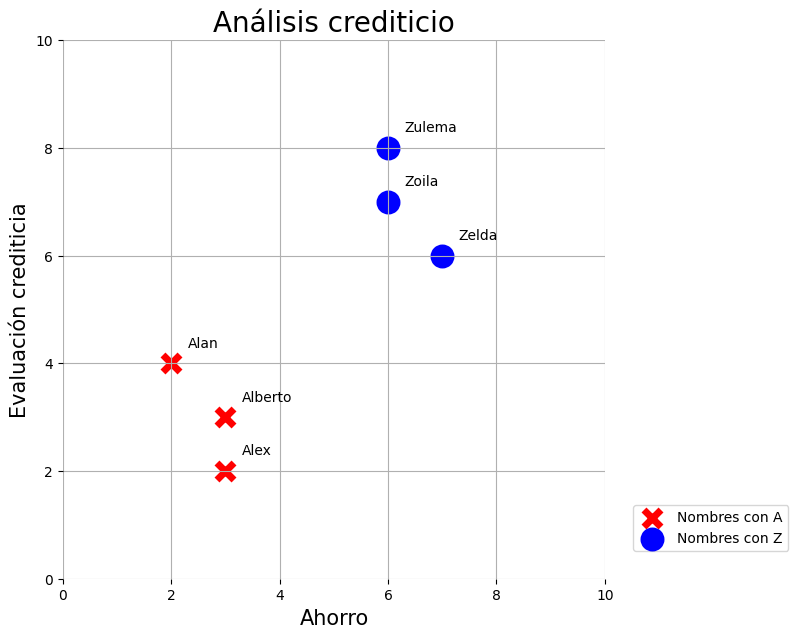

In [14]:
plt.figure(figsize=(7, 7))
plt.title("Análisis crediticio", fontsize=20)

# Accedemos por posición con iloc para las primeras 3 columnas
plt.scatter(datos.iloc[0, :3],  # Ahorro para los primeros 3 nombres
            datos.iloc[1, :3],  # Evaluación para los primeros 3 nombres
            marker="x", s=150, color="red",
            linewidths=5, label="Nombres con A")

# Accedemos por posición con iloc para las últimas 3 columnas
plt.scatter(datos.iloc[0, 3:],  # Ahorro para los últimos 3 nombres
            datos.iloc[1, 3:],  # Evaluación para los últimos 3 nombres
            marker="o", s=150, color="blue",
            linewidths=5, label="Nombres con Z")

# Agregar etiquetas a los puntos
for i in range(len(datos.columns)):
    plt.text(datos.iloc[0, i] + 0.3,  # Ahorro
             datos.iloc[1, i] + 0.3,  # Evaluación
             datos.columns[i].capitalize())

plt.xlabel("Ahorro", fontsize=15)
plt.ylabel("Evaluación crediticia", fontsize=15)
plt.legend(bbox_to_anchor=(1.35, 0.15))
plt.box(False)
plt.xlim(0, 10.01)
plt.ylim(0, 10.01)
plt.grid()
plt.show()

# Matrices para la propagación de afinidad

### s: Similitid(entrada)
### r: Responsabilidad
### d: Disponibilidad
### a: Asignaciones(salida)

# Similitud entre dos puntos i, k

### Métrica: Distancia Euclidiana al Cuadrado

In [15]:
datos

,alan,alberto,alex,zelda,zoila,zulema
ahorro,2,3,3,7,6,6
evaluacion,4,3,2,6,7,8


In [18]:
print("Similitud entre Alan y Alberto:", -((datos["alan"] - datos["alberto"])**2).sum())
print("Similitud entre Alan y Zulema:", -((datos["alan"] - datos["zulema"])**2).sum())

Similitud entre Alan y Alberto: -2
Similitud entre Alan y Zulema: -32


# Creación de Matriz de Similitud para i != k

In [23]:
# Crear DataFrame 's' con ceros y las mismas columnas e índices que 'datos'
s = pd.DataFrame(0, columns=datos.columns, index=datos.columns)

# Calcular la distancia negativa entre las personas
for i in personas:
    for k in personas:
        s.loc[i, k] = -((datos[i] - datos[k])**2).sum()

s

,alan,alberto,alex,zelda,zoila,zulema
alan,0,-2,-5,-29,-25,-32
alberto,-2,0,-1,-25,-25,-34
alex,-5,-1,0,-32,-34,-45
zelda,-29,-25,-32,0,-2,-5
zoila,-25,-25,-34,-2,0,-1
zulema,-32,-34,-45,-5,-1,0


# Preferencia a priori de cada punto como Ejemplar

- Sería colocar el valor mínimo en la diagonal.

In [24]:
np.fill_diagonal(s.values, np.min(s.values))
s

,alan,alberto,alex,zelda,zoila,zulema
alan,-45,-2,-5,-29,-25,-32
alberto,-2,-45,-1,-25,-25,-34
alex,-5,-1,-45,-32,-34,-45
zelda,-29,-25,-32,-45,-2,-5
zoila,-25,-25,-34,-2,-45,-1
zulema,-32,-34,-45,-5,-1,-45


# Mensajes de Disponibilidad

### Evidencia de que tan adecuado  es el emisor como Ejemplar

- En este punto la vamos a defiir con ceros, a medida que vayamos iterando, se irá ajustando.

In [25]:
d = pd.DataFrame(0, columns=datos.columns, index=datos.columns)
d

,alan,alberto,alex,zelda,zoila,zulema
alan,0,0,0,0,0,0
alberto,0,0,0,0,0,0
alex,0,0,0,0,0,0
zelda,0,0,0,0,0,0
zoila,0,0,0,0,0,0
zulema,0,0,0,0,0,0


# Mensaje de Responsabilidad

### Evidencia de que tan adecuado es el receptor como Ejemplar

In [26]:
# La responsabilidad se actualiza a partir de la similitud y la disponibilidad
s

,alan,alberto,alex,zelda,zoila,zulema
alan,-45,-2,-5,-29,-25,-32
alberto,-2,-45,-1,-25,-25,-34
alex,-5,-1,-45,-32,-34,-45
zelda,-29,-25,-32,-45,-2,-5
zoila,-25,-25,-34,-2,-45,-1
zulema,-32,-34,-45,-5,-1,-45


In [27]:
# Responsabilidad ["alan", "alberto"]
sim = s.loc["alan", "alberto"]

sim_otros = s.loc["alan", ["alan", "alex", "zelda", "zoila", "zulema"]]

dis_otros = d.loc["alan", ["alan", "alex", "zelda", "zoila", "zulema"]]

print("Qué tan adecuado es Alberto como EJEMPLAR para Alan:", sim - max(sim_otros + dis_otros))

# Responsabilidad ["alan", "zulema"]
sim = s.loc["alan", "zulema"]

sim_otros = s.loc["alan", ["alan", "alberto", "alex", "zelda", "zoila"]]

dis_otros = d.loc["alan", ["alan", "alberto", "alex", "zelda", "zoila"]]

print("Qué tan adecuada es Zulema como EJEMPLAR para Alan:", sim - max(sim_otros + dis_otros))

Qué tan adecuado es Alberto como EJEMPLAR para Alan: 3
Qué tan adecuada es Zulema como EJEMPLAR para Alan: -30


# Algoritmo Principal - Actualización de Matrices

### r: Responsabilidad
### d: Disponibilidad
### a: Asignaciones

In [29]:
# Matriz de responsabilidad
r = pd.DataFrame(0, columns=datos.columns, index=datos.columns)
d = pd.DataFrame(0.0, columns=datos.columns, index=datos.columns)  # inicializa d con valores flotantes

for i in range(10):
    factor = 0.5
    
    # Actualización de responsabilidades
    r_anterior = r.copy()
    
    for i in personas:
        for k in personas:
            elegibles = list(personas.difference({k}))
            r.loc[i, k] = s.loc[i, k] - max(s.loc[i, elegibles] + d.loc[i, elegibles])
            
    r = (1 - factor) * r + factor * r_anterior
    
    # Actualización de disponibilidad
    d_anterior = d.copy()
    
    for i in personas:
        for k in personas:
            if i == k:
                elegibles = list(personas.difference({i}))
                d.loc[k, k] = float(r.loc[elegibles, k][r.loc[elegibles, k] > 0].sum())
            else:
                elegibles = list(personas.difference({i, k}))
                d.loc[i, k] = float(min(0, r.loc[k, k] + r.loc[elegibles, k][r.loc[elegibles, k] > 0].sum()))
                
    d = (1 - factor) * d + factor * d_anterior
    
# Actualización de asignaciones
a = r + d

# Matriz de asignaciones

In [30]:
np.set_printoptions(precision=2)
print("Máximos:", a.max(1).values)
print("Posición de los máximos:", np.argmax(a.values, axis=1))
a.round(decimals=2)

Máximos: [21.63 25.59 26.4  21.63 25.59 26.4 ]
Posición de los máximos: [1 1 1 4 4 4]


,alan,alberto,alex,zelda,zoila,zulema
alan,-31.67,21.63,-30.44,-54.04,-20.28,-55.87
alberto,-32.36,25.59,-31.23,-48.59,-18.82,-56.41
alex,-31.62,26.40,-30.64,-56.80,-29.03,-68.62
zelda,-54.04,-20.28,-55.87,-31.67,21.63,-30.44
zoila,-48.59,-18.82,-56.41,-32.36,25.59,-31.23
zulema,-56.80,-29.03,-68.62,-31.62,26.40,-30.64


# Propagación de Afinidad

In [31]:
clustering = AffinityPropagation(random_state=None).fit(datos.T.values)
print("Etiquetas de Clusters:", clustering.labels_)
print("Índices de Centroides:", clustering.cluster_centers_indices_)

Etiquetas de Clusters: [0 0 0 1 1 1]
Índices de Centroides: [1 4]
